# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [66]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[5, 6, 4, 0, 2, 3, 9, 1, 7, 8]

In [67]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [68]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(4.884562105773082)

Tour length: 4.88


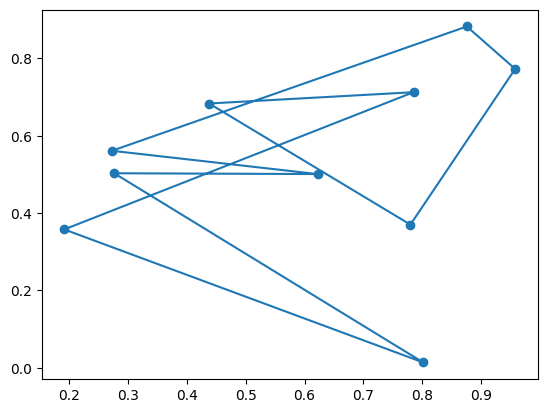

In [69]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]
    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): 
            tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        # Mengganti append() dengan concat()
        pos_ = pd.concat([pos_, pos_.iloc[0:1]])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [70]:
%pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [71]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [72]:
%%R
if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

In [73]:
d = tsp["dist"]

Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [74]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class 'TSP' 
10 cities (distance 'unknown') 
object of class 'TOUR' 
result of method 'arbitrary_insertion+two_opt_rep_100' for 10 cities
tour length: 2.763574 


Tour length: 2.76


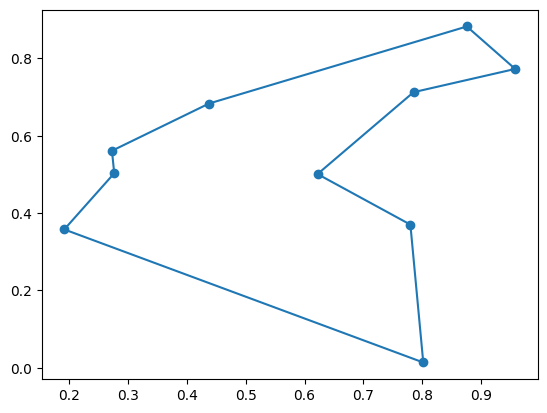

In [75]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [76]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr   min     lq    mean median     uq  max neval
 tsp <- TSP(d) 217.8 222.55 285.306 229.25 257.75 1591   100


In [77]:
def swap_cities(tour, i, j):
    """Helper function to swap two cities in a tour"""
    new_tour = tour.copy()
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

- Menghitung fungsi objektif untuk semua local moves
- Selalu memilih move terbaik dari semua kemungkinan

Tour length: 2.7865169894199324
Tour length: 2.79


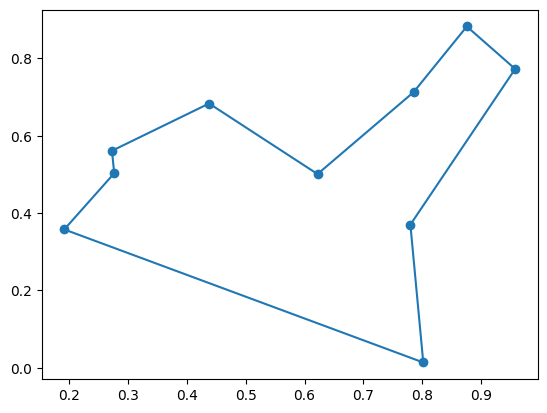

In [ ]:
def steepest_hill_climbing(tsp, initial_tour, max_iter=1000):
    """Fungsi Untuk mencari solusi TSP menggunakan algoritma steepest hill climbing"""

    current_tour = initial_tour.copy() # Membuat salinan tour awal untuk menghindari modifikasi pada tour awal
    current_length = tour_length(tsp, current_tour) # Menghitung panjang tour saat ini
    n = len(current_tour) # Mendapatkan jumlah kota dalam tour
    
    # Melakukan iterasi sebanyak max_iter
    for _ in range(max_iter): 
        best_neighbor = current_tour # Inisialisasi neighbor terbaik dengan tour saat ini
        best_length = current_length # Inisialisasi panjang terbaik dengan panjang saat ini
        
        # Memeriksa semua kemungkinan pertukaran kota
        for i in range(n):
            for j in range(i+1, n):
                # Mencoba menukar posisi dua kota
                neighbor = swap_cities(current_tour, i, j)
                # Menghitung panjang tour setelah pertukaran
                neighbor_length = tour_length(tsp, neighbor)
                
                # Jika ditemukan tour yang lebih pendek
                if neighbor_length < best_length:
                    best_neighbor = neighbor # Memperbarui neighbor terbaik
                    best_length = neighbor_length # Memperbarui panjang terbaik
        
        # Jika tidak ada perbaikan, hentikan pencarian
        if best_length >= current_length:
            break
            
        current_tour = best_neighbor # Memperbarui tour saat ini dengan neighbor terbaik
        current_length = best_length # Memperbarui panjang tour saat ini

    # Mengembalikan tour saat ini dengan panjangnya    
    return current_tour, current_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = steepest_hill_climbing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.
- Variasi dari algoritma Steepest Ascent Hill Climbing yang menambahkan komponen restart acak untuk mengatasi masalah local optima.

Tour length: 2.763573577757701
Tour length: 2.76


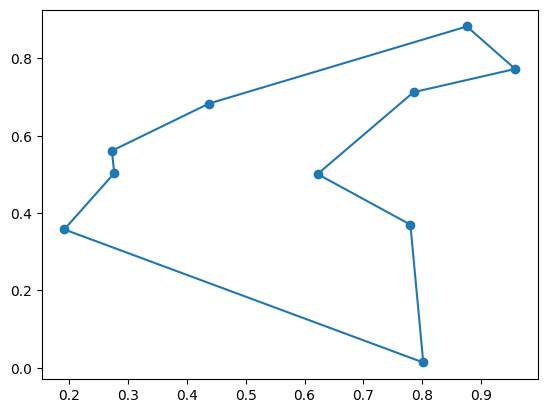

In [ ]:
def steepest_hill_climbing_random_restart(tsp, num_restarts=10):
    """Steepest-ascend hill climbing dengan restart acak"""
    best_tour = None # Menyimpan tour terbaik
    best_length = float('inf') # Menyimpan panjang tour terbaik
    
    # Melakukan restart sebanyak num_restarts kali
    for _ in range(num_restarts):
        initial_tour = random_tour(len(tsp['pos'])) # Membuat tour awal acak baru
        tour, length = steepest_hill_climbing(tsp, initial_tour) # Menjalankan steepest hill climbing
        # Memperbarui jika menemukan solusi yang lebih baik
        if length < best_length:
            best_tour = tour
            best_length = length
            
    return best_tour, best_length

# Test the algorithm
best_tour, best_length = steepest_hill_climbing_random_restart(tsp)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Tour length: 2.8810894251962424
Tour length: 2.88


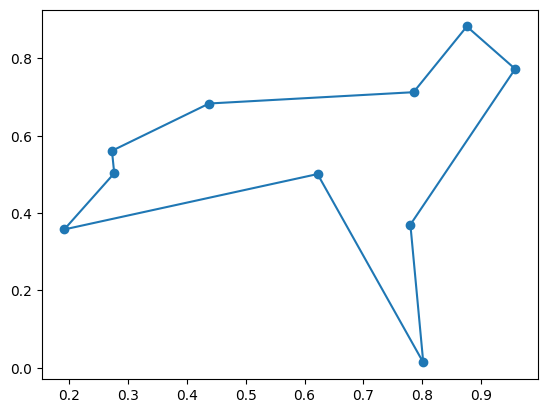

In [80]:
def stochastic_hill_climbing(tsp, initial_tour, max_iter=1000):
    """Stochastic hill climbing for TSP"""
    current_tour = initial_tour.copy()
    current_length = tour_length(tsp, current_tour)
    n = len(current_tour)
    
    for _ in range(max_iter):
        # Generate random swap
        i, j = random.sample(range(n), 2)
        neighbor = swap_cities(current_tour, i, j)
        neighbor_length = tour_length(tsp, neighbor)
        
        if neighbor_length < current_length:
            current_tour = neighbor
            current_length = neighbor_length
            
    return current_tour, current_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = stochastic_hill_climbing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Tour length: 3.343031014902228
Tour length: 3.34


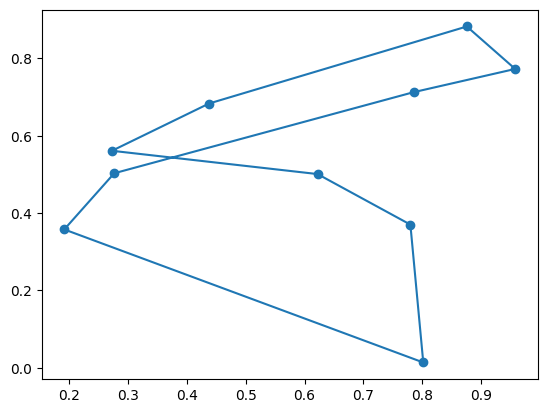

In [86]:
def first_choice_hill_climbing(tsp, initial_tour, max_attempts=100, max_iter=1000):
    """First-choice hill climbing for TSP"""
    current_tour = initial_tour.copy()
    current_length = tour_length(tsp, current_tour)
    n = len(current_tour)
    
    for _ in range(max_iter):
        found_better = False
        attempts = 0
        
        # Keep trying random neighbors until finding a better one or max attempts reached
        while attempts < max_attempts and not found_better:
            # Generate random neighbor by swapping two random cities
            i, j = random.sample(range(n), 2)
            neighbor = swap_cities(current_tour, i, j)
            neighbor_length = tour_length(tsp, neighbor)
            
            # Accept first improvement found
            if neighbor_length < current_length:
                current_tour = neighbor
                current_length = neighbor_length
                found_better = True
            
            attempts += 1
            
        # If no better neighbor found after max_attempts, we're at a local optimum
        if not found_better:
            break
            
    return current_tour, current_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = first_choice_hill_climbing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Simulated Annealing [2 Points]

Tour length: 2.786516989419932
Tour length: 2.79


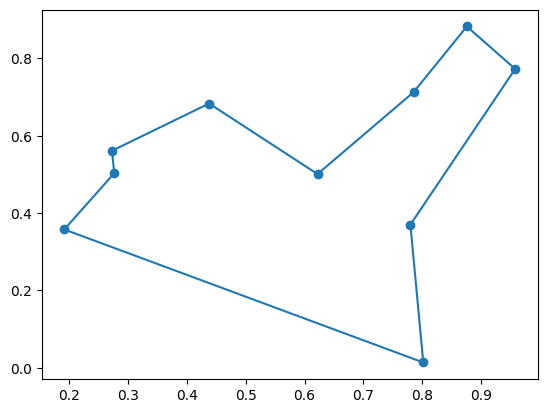

In [82]:
def simulated_annealing(tsp, initial_tour, temp=1000.0, cooling_rate=0.995, min_temp=1e-8):
    """Simulated annealing for TSP"""
    current_tour = initial_tour.copy()
    current_length = tour_length(tsp, current_tour)
    best_tour = current_tour.copy()
    best_length = current_length
    temperature = temp
    n = len(current_tour)
    
    while temperature > min_temp:
        i, j = random.sample(range(n), 2)
        neighbor = swap_cities(current_tour, i, j)
        neighbor_length = tour_length(tsp, neighbor)
        
        # Calculate acceptance probability
        delta = neighbor_length - current_length
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_tour = neighbor
            current_length = neighbor_length
            
            if current_length < best_length:
                best_tour = current_tour.copy()
                best_length = current_length
                
        temperature *= cooling_rate
        
    return best_tour, best_length

# Test the algorithm
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = simulated_annealing(tsp, initial_tour)
print(f"Tour length: {best_length}")
show_tsp(tsp, best_tour)

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [83]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.35858154296875 milliseconds


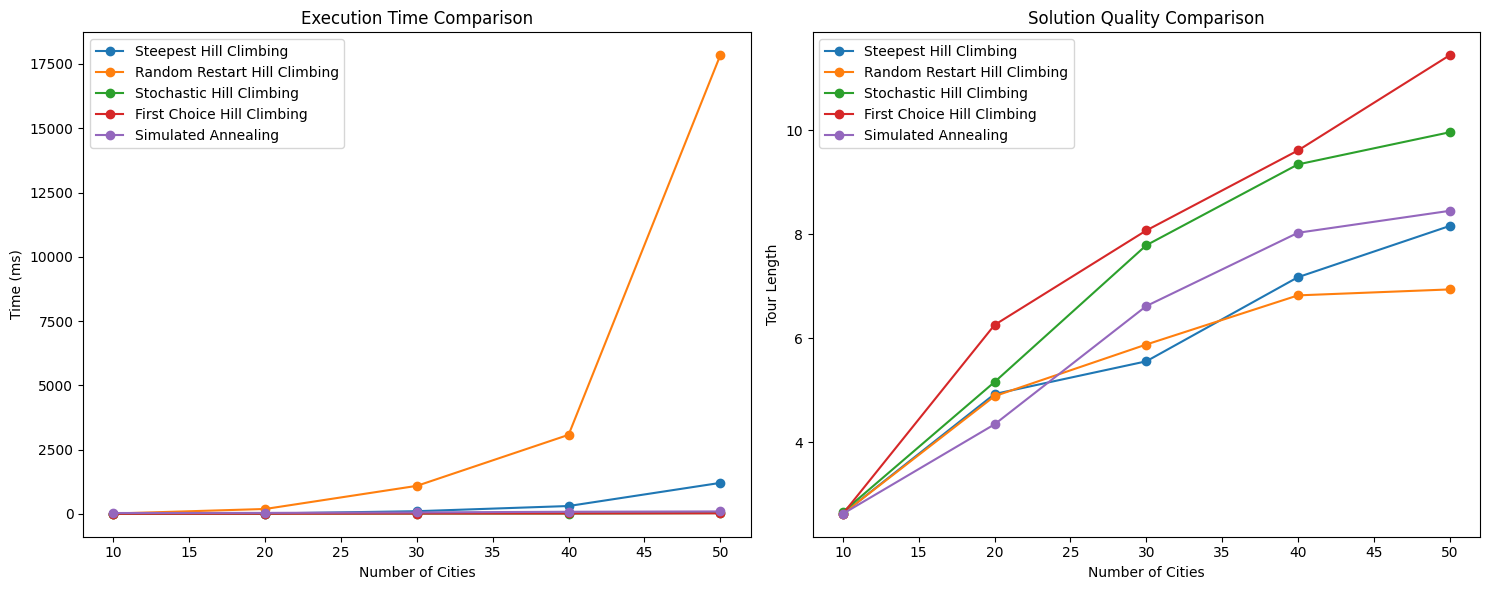


Detailed Results:
                       Algorithm  Size  Tour Length  Time (ms)
0         Steepest Hill Climbing    10         2.62       1.19
1   Random Restart Hill Climbing    10         2.62      11.74
2       Stochastic Hill Climbing    10         2.65       5.25
3     First Choice Hill Climbing    10         2.62       1.41
4            Simulated Annealing    10         2.62      31.83
5         Steepest Hill Climbing    20         4.92      11.42
6   Random Restart Hill Climbing    20         4.88     188.54
7       Stochastic Hill Climbing    20         5.16       8.57
8     First Choice Hill Climbing    20         6.25       3.73
9            Simulated Annealing    20         4.34      36.13
10        Steepest Hill Climbing    30         5.55     102.21
11  Random Restart Hill Climbing    30         5.88    1088.72
12      Stochastic Hill Climbing    30         7.79       9.41
13    First Choice Hill Climbing    30         8.07      10.33
14           Simulated Annealing    

In [92]:
def compare_algorithms(tsp_sizes=[10, 20, 30, 40, 50]):
    """Compare performance of 5 different algorithms"""
    results = []
    
    for size in tsp_sizes:
        test_tsp = random_tsp(size)
        initial_tour = random_tour(size)
        
        # Define 5 algorithms to compare
        algorithms = [
            ("Steepest Hill Climbing", steepest_hill_climbing),
            ("Random Restart Hill Climbing", steepest_hill_climbing_random_restart),
            ("Stochastic Hill Climbing", stochastic_hill_climbing),
            ("First Choice Hill Climbing", first_choice_hill_climbing),
            ("Simulated Annealing", simulated_annealing)
        ]
        
        # Run each algorithm and collect results
        for name, algo in algorithms:
            start_time = time.time()
            tour, length = algo(test_tsp, initial_tour) if name != "Random Restart Hill Climbing" else algo(test_tsp)
            end_time = time.time()
            
            results.append({
                'Algorithm': name,
                'Size': size,
                'Tour Length': length,
                'Time (ms)': (end_time - start_time) * 1000
            })
    
    # Convert results to DataFrame
    df = pd.DataFrame(results)
    
    # Create visualization with two subplots
    plt.figure(figsize=(15, 6))
    
    # Plot 1: Execution Time
    plt.subplot(1, 2, 1)
    for name in df['Algorithm'].unique():
        data = df[df['Algorithm'] == name]
        plt.plot(data['Size'], data['Time (ms)'], marker='o', label=name)
    plt.xlabel('Number of Cities')
    plt.ylabel('Time (ms)')
    plt.title('Execution Time Comparison')
    plt.legend()
    
    # Plot 2: Solution Quality
    plt.subplot(1, 2, 2)
    for name in df['Algorithm'].unique():
        data = df[df['Algorithm'] == name]
        plt.plot(data['Size'], data['Tour Length'], marker='o', label=name)
    plt.xlabel('Number of Cities')
    plt.ylabel('Tour Length')
    plt.title('Solution Quality Comparison')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("\nDetailed Results:")
    print(df)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    summary = df.groupby('Algorithm').agg({
        'Time (ms)': ['mean', 'std'],
        'Tour Length': ['mean', 'std']
    }).round(2)
    print(summary)

# Run comparison
compare_algorithms()

## Bonus: Genetic Algorithm [+1 Point]

Generation 0: Best Length = 3.5381179858963323
Generation 10: Best Length = 2.8701519385212504
Generation 20: Best Length = 2.763573577757701
Generation 30: Best Length = 2.763573577757701
Generation 40: Best Length = 2.763573577757701
Generation 50: Best Length = 2.763573577757701
Generation 60: Best Length = 2.763573577757701
Generation 70: Best Length = 2.763573577757701
Generation 80: Best Length = 2.763573577757701
Generation 90: Best Length = 2.763573577757701

Final Tour Length: 2.763573577757701
Tour length: 2.76


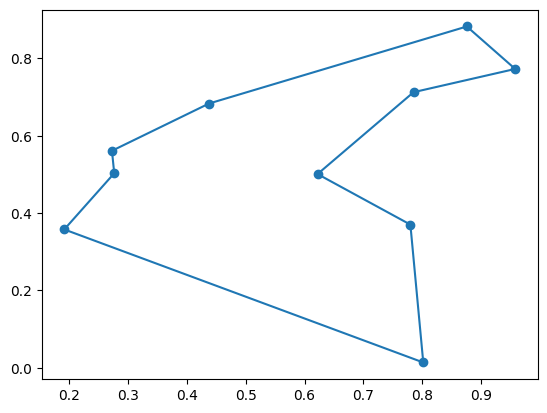

In [88]:
def genetic_algorithm_tsp(tsp, pop_size=50, num_generations=100, mutation_rate=0.1, elite_size=5):
    """
    Algoritma genetika untuk menyelesaikan TSP
    Args:
        tsp: Problem TSP
        pop_size: Ukuran populasi
        num_generations: Jumlah generasi
        mutation_rate: Tingkat mutasi
        elite_size: Jumlah individu elite yang dipertahankan
    """
    
    def create_initial_population(n, size):
        """Membuat populasi awal secara acak"""
        return [random_tour(n) for _ in range(size)]
    
    def fitness(tour):
        """Menghitung nilai fitness (1/panjang_tour)"""
        return 1.0 / tour_length(tsp, tour)
    
    def order_crossover(parent1, parent2):
        """Operator crossover dengan metode Order Crossover (OX)"""
        n = len(parent1)
        start, end = sorted(random.sample(range(n), 2))
        
        # Mengambil subsequence dari parent1
        child = [-1] * n
        for i in range(start, end + 1):
            child[i] = parent1[i]
        
        # Mengisi sisa posisi dengan urutan dari parent2
        remaining = [x for x in parent2 if x not in child[start:end + 1]]
        j = 0
        for i in range(n):
            if child[i] == -1:
                child[i] = remaining[j]
                j += 1
                
        return child
    
    def mutate(tour):
        """Operator mutasi dengan swap mutation"""
        if random.random() < mutation_rate:
            i, j = random.sample(range(len(tour)), 2)
            tour[i], tour[j] = tour[j], tour[i]
        return tour
    
    # Inisialisasi populasi
    n = len(tsp['pos'])
    population = create_initial_population(n, pop_size)
    best_tour = None
    best_length = float('inf')
    
    # Evolusi selama num_generations
    for gen in range(num_generations):
        # Evaluasi fitness
        fitness_scores = [(tour, fitness(tour)) for tour in population]
        fitness_scores.sort(key=lambda x: x[1], reverse=True)
        
        # Simpan individu terbaik
        current_best = fitness_scores[0][0]
        current_length = tour_length(tsp, current_best)
        if current_length < best_length:
            best_tour = current_best
            best_length = current_length
        
        # Seleksi elit
        new_population = [tour for tour, _ in fitness_scores[:elite_size]]
        
        # Seleksi dan reproduksi
        while len(new_population) < pop_size:
            # Tournament selection
            parent1 = random.choice([tour for tour, _ in fitness_scores[:pop_size//2]])
            parent2 = random.choice([tour for tour, _ in fitness_scores[:pop_size//2]])
            
            # Crossover
            child = order_crossover(parent1, parent2)
            
            # Mutasi
            child = mutate(child)
            
            new_population.append(child)
            
        population = new_population
        
        if gen % 10 == 0:
            print(f"Generation {gen}: Best Length = {best_length}")
    
    return best_tour, best_length

# Test algoritma
initial_tour = random_tour(len(tsp['pos']))
best_tour, best_length = genetic_algorithm_tsp(tsp)
print(f"\nFinal Tour Length: {best_length}")
show_tsp(tsp, best_tour)